# Discrete Policy Gradient

https://towardsdatascience.com/policy-gradients-in-reinforcement-learning-explained-ecec7df94245

https://towardsdatascience.com/cliff-walking-problem-with-the-discrete-policy-gradient-algorithm-59d1900d80d8

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
env = gym.make('FrozenLake-v1')
states = env.observation_space.n
actions = env.action_space.n

## Functions

In [103]:
def pi(state, theta):

    logits = np.zeros(actions)

    for action in range(actions):
        logit = np.exp(theta[state, action])
        logits[action] = logit
        
    return logits / np.sum(logits)

In [105]:
def update_policy(ep_states, ep_actions, ep_probs, ep_returns, theta, alpha):
    
    for t in range(0,len(ep_states)):
        state = ep_states[t]
        action = ep_actions[t]
        prob = ep_probs[t]
        action_return = ep_returns[t]

        phi = np.zeros([1, actions])
        phi[0, action] = 1
 
        score = phi - prob
        theta[state, :] = theta[state, :] + alpha * action_return * score

    return theta

### FIX 

In [104]:
def calc_return(ep_rewards: list, gamma = 1): #TODO This does not work for gamma other than 1
    
    ep_returns = []
    temp = 0

    ep_rewards.reverse()

    for i in range (0, len(ep_rewards)):
        temp += ep_rewards[i] * gamma ** (i)
        ep_returns.append(temp)

    ep_returns.reverse()

    return ep_returns

In [100]:
ep_rewards = [3, 0, 10]
gamma = 0.9
length = len(ep_rewards)
#ep_rewards.reverse()

ep_returns = []
for i in range((length - 1), -1, -1):
    temp = 0
    for j in range(0, i+1):
        print(f"{ep_rewards[(length - 1) - j]} {gamma} ** {j}")
        #temp += ep_rewards[i] * gamma ** j
        #print(temp)
        #ep_returns.append(ep_rewards[i] * gamma ** j)
    
    print()

#print(ep_returns)

10 0.9 ** 0
0 0.9 ** 1
3 0.9 ** 2

10 0.9 ** 0
0 0.9 ** 1

10 0.9 ** 0



## Runner

In [106]:
def run(MAX_EPISODES = 1000, is_training = False, isSlippery = False, alpha = 0.9, gamma = 1):
    env = gym.make('FrozenLake-v1', is_slippery = isSlippery)
    
    total_reward = []
    total_successes = 0

    if is_training == False:
        theta = np.zeros((states, actions))
    else:
        theta = np.loadtxt('theta', delimiter=",")


    for episode in range(MAX_EPISODES):
        state = env.reset()[0]
        ep_states, ep_actions, ep_probs, ep_rewards, total_ep_rewards = [], [], [], [], 0
        terminated, truncated = False, False

        # gather trajectory
        while not terminated and not truncated:
            ep_states.append(state)
            action_probs = pi(state, theta)
            ep_probs.append(action_probs)
            action = np.random.choice(np.array([0, 1, 2, 3]), p = action_probs)
            ep_actions.append(action)
            state, reward, terminated, truncated, __ = env.step(action)
            ep_rewards.append(reward)
            total_ep_rewards += reward
            if reward == 1: total_successes += 1


        # calculate episode return & add total episode reward to totalReward
        ep_returns = calc_return(ep_rewards, 1)
        total_reward.append(sum(ep_rewards))
            
        # update policy
        update_policy(ep_states, ep_actions, ep_probs, ep_returns, theta, alpha)

    np.savetxt('theta', theta, delimiter= ',')
    env.close()
    
    # evaluate model

    # success rate
    success_rate = (total_successes/MAX_EPISODES)*100
    print(f"Success rate after {MAX_EPISODES} episodes = {success_rate}%")

    # graph of cumulative reward
    cumulative_reward = np.cumsum(total_reward)
    plt.plot(cumulative_reward)
    plt.title('Cumulative reward per episode')
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.show()
        

Success rate after 100 episodes = 42.0%


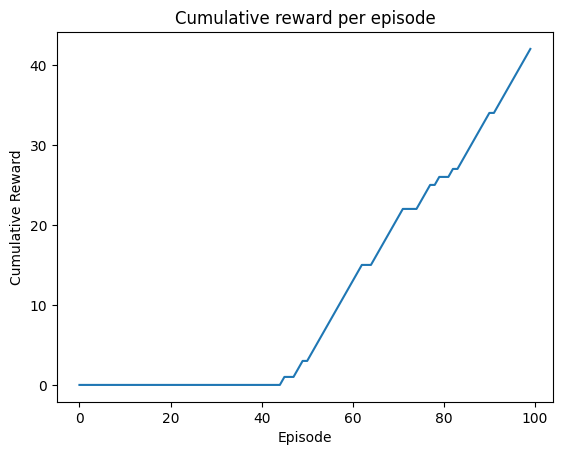

In [109]:
run(MAX_EPISODES = 100, isSlippery = False)